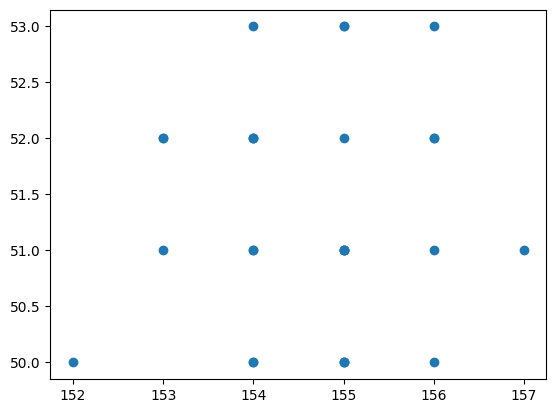

In [2]:
# Oppgave 7 og 8

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = np.array(pd.read_csv("kai.csv"))

plt.scatter(data[:,1], data[:,2], label="Kai")

In [3]:
# Sentrere dataene ved å trekke fra gjennomsnittet
X_centered = data[:,1] - np.mean(data[:,1])
Y_centered = data[:,2] - np.mean(data[:,2])

# Beregn kovariansmatrisen
cov_matrix = np.cov(X_centered, Y_centered)

# Beregn egenverdier og egenvektorer for kovariansmatrisen
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Finn korrelasjonen mellom de to aksene
correlation = np.corrcoef(data[:,1], data[:,2])

print(f""""
Eigenvalues: {eigenvalues}
Eigenvectors: {eigenvectors}

Cov matrix: {cov_matrix}
Correlation: {correlation}
""")


"
Eigenvalues: [1.30100092 1.01513664]
Eigenvectors: [[ 0.95368089 -0.30082015]
 [ 0.30082015  0.95368089]]

Cov matrix: [[1.27513228 0.08201058]
 [0.08201058 1.04100529]]
Correlation: [[1.         0.07118128]
 [0.07118128 1.        ]]



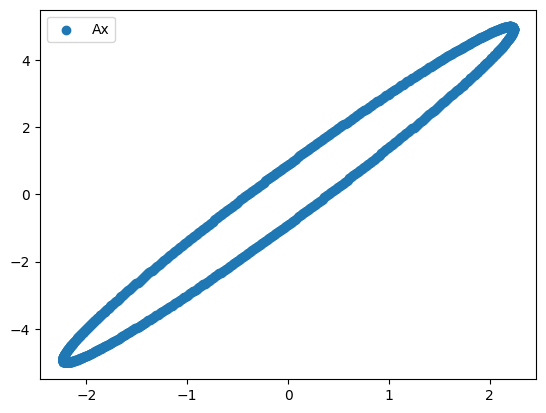

In [8]:
# Oppgave 10: skriv en ruting som tar inn en reell 2x2 matrise A og plotter Ax for alle x i enhetssirkelen

def plot_Ax(A):
    # Generer 1000 punkter på enhetssirkelen
    x = np.linspace(0, 2*np.pi, 1000)
    x = np.array([np.cos(x), np.sin(x)])

    # Beregn Ax for alle x
    Ax = np.dot(A, x)

    plt.scatter(Ax[0], Ax[1], label="Ax")
    plt.legend()
    plt.show()

A = np.array([[1, 2], [3, 4]])
plot_Ax(A)

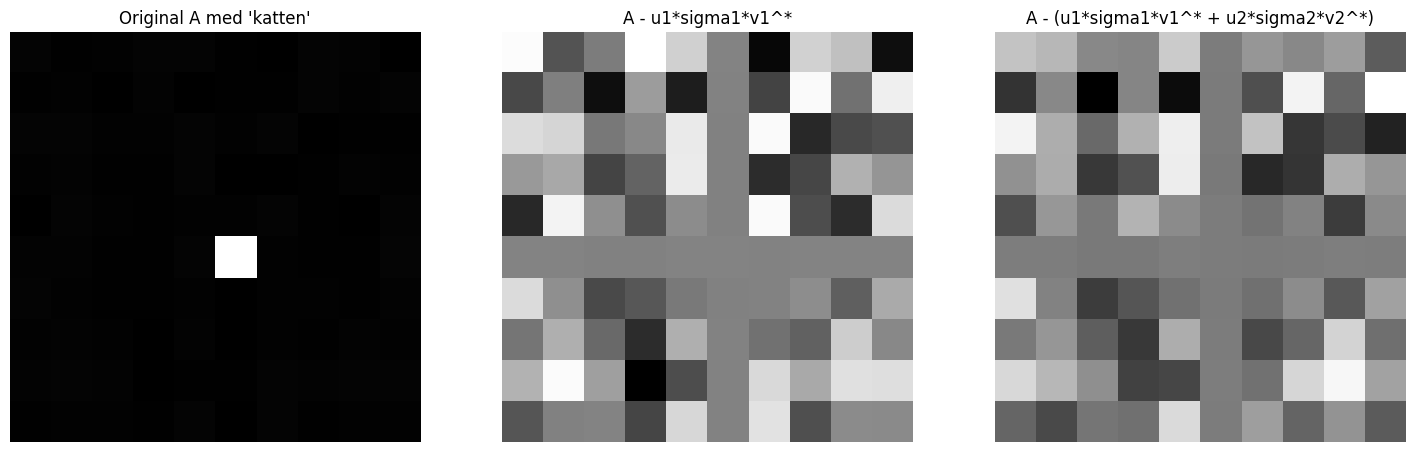

In [23]:
# Oppgave 16: Hva er en katt?

def create_cat_matrix():
    # Oppretter en matrise A med tilfeldige tall mellom -1 og 1
    A = np.random.uniform(-1, 1, (10, 10))
    
    # Setter ett element til 100 for å representere "katten"
    A[5, 5] = 100
    
    return A

def perform_svd_and_transform(A):
    # Utfører singulærverdi-dekomponering
    U, S, Vt = np.linalg.svd(A, full_matrices=False)
    
    # Rekonstruerer A minus den første singulær komponenten
    A_minus_u1s1v1 = A - S[0] * np.outer(U[:, 0], Vt[0, :])
    
    # Rekonstruerer A minus de to første singulære komponentene
    A_minus_u1s1v1_u2s2v2 = A - (S[0] * np.outer(U[:, 0], Vt[0, :]) + S[1] * np.outer(U[:, 1], Vt[1, :]))
    
    return A_minus_u1s1v1, A_minus_u1s1v1_u2s2v2

# Lager matrise A og utfører SVD
A = create_cat_matrix()
A_minus_u1s1v1, A_minus_u1s1v1_u2s2v2 = perform_svd_and_transform(A)

# Plotting
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
ax[0].imshow(A, cmap='gray', interpolation='nearest')
ax[0].set_title("Original A med 'katten'")

ax[1].imshow(A_minus_u1s1v1, cmap='gray', interpolation='nearest')
ax[1].set_title("A - u1*sigma1*v1^*")

ax[2].imshow(A_minus_u1s1v1_u2s2v2, cmap='gray', interpolation='nearest')
ax[2].set_title("A - (u1*sigma1*v1^* + u2*sigma2*v2^*)")

for a in ax:
    a.axis('off')

plt.show()
